Suitable crop for Suitable soil




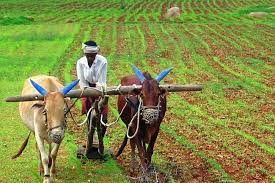

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import BaggingClassifier

This is dataset which is used to recommend the crop for the suitable soil. This will be very useful in crop production (Agriculture) without looses based on soli ph, rainfall, humedity and other chemical components present in the soil.

In [3]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# About Data

Nitrogen is so vital because it is a major component of chlorophyll, the compound by which plants use sunlight energy to produce sugars from water and carbon dioxide (i.e., photosynthesis). It is also a major component of amino acids, the building blocks of proteins. Without proteins, plants wither and die.

Phosphorus is, therefore, important in cell division and development of new tissue. Phosphorus is also associated with complex energy transformations in the plant. Adding phosphorus to soil low in available phosphorus promotes root growth and winter hardiness, stimulates tillering, and often hastens maturity.

Potassium is a critical nutrient that plants absorb from the soil, and from fertilizer. It increases disease resistance, helps stalks to grow upright and sturdy, improves drought tolerance, and helps plants get through the winter.

The average soil temperatures for bioactivity range from 50 to 75F. These values are favorable for normal life functions of earth biota that ensure proper organic matter decomposition, increased nitrogen mineralization, uptake of soluble substances, and metabolism.

The pH range 5.5–6.5 is optimal for plant growth as the availability of nutrients is optimal.

Besides disease, rainfall can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to faster-growing plants, which can cut down on germination time and the length between seeding and harvest.


In [4]:
print("Shape of the dataframe:",df.shape)

Shape of the dataframe: (2200, 8)


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## EDA:Exploratory Data Analysis

<ipython-input-12-459146c1e5b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['N'],bins=20,kde=True)


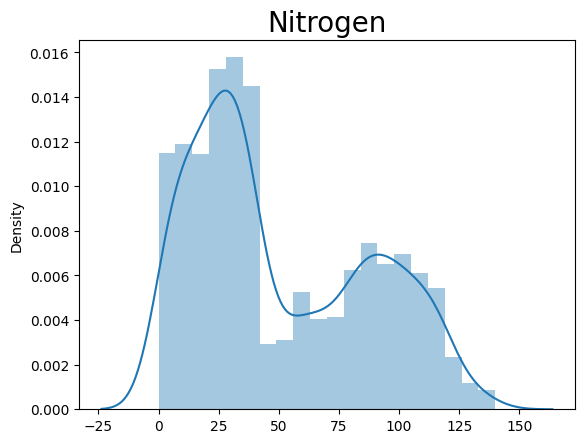

In [12]:
sns.distplot(x=df['N'],bins=20,kde=True)
plt.title("Nitrogen",size=20)
plt.show()

<ipython-input-15-b80860a425d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['P'],bins=20,kde=True)


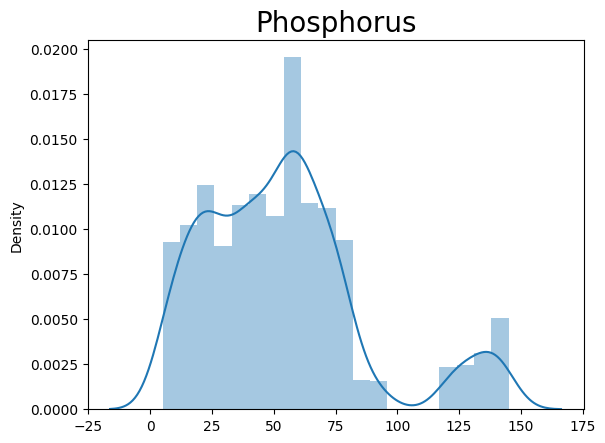

In [15]:
sns.distplot(x=df['P'],bins=20,kde=True)
plt.title("Phosphorus",size=20)
plt.show()

<ipython-input-16-84b81140fbbc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['K'],bins=20,kde=True)


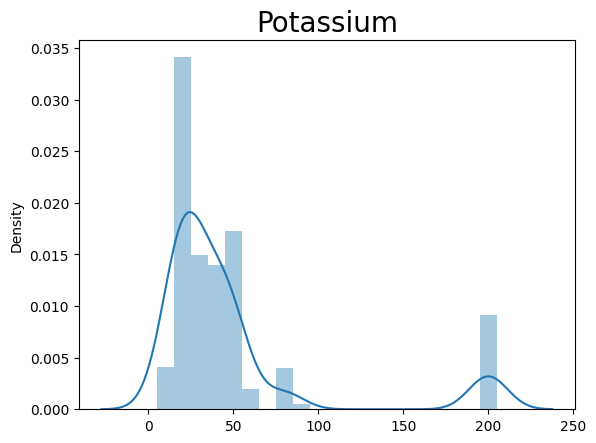

In [16]:
sns.distplot(x=df['K'],bins=20,kde=True)
plt.title("Potassium",size=20)
plt.show()

<ipython-input-17-37014cbf6a93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['temperature'],bins=20,kde=True)


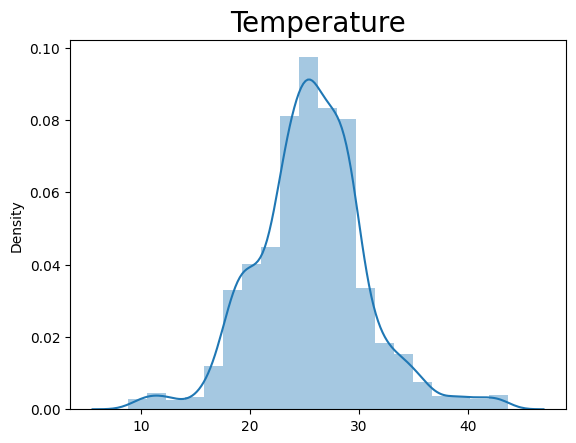

In [17]:
sns.distplot(x=df['temperature'],bins=20,kde=True)
plt.title("Temperature",size=20)
plt.show()

<ipython-input-18-a428f6ff5640>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['humidity'],bins=20,kde=True)


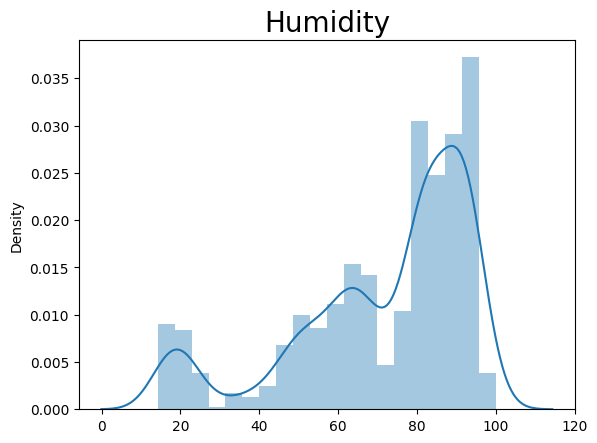

In [18]:
sns.distplot(x=df['humidity'],bins=20,kde=True)
plt.title("Humidity",size=20)
plt.show()

<ipython-input-19-e05c0708bce2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['rainfall'],bins=20,kde=True)


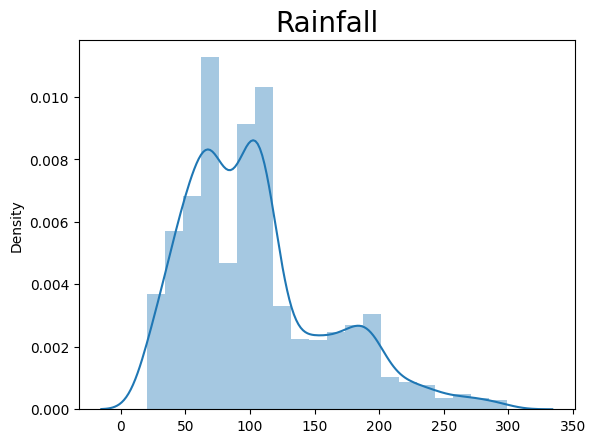

In [19]:
sns.distplot(x=df['rainfall'],bins=20,kde=True)
plt.title("Rainfall",size=20)
plt.show()

Categorical Plot

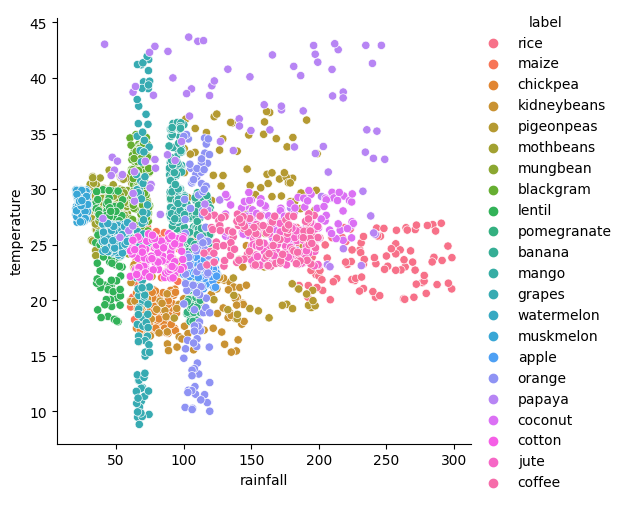

In [20]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

In [21]:
# Outlier detection using Graphs

In [22]:
# Unique values in the label column

crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [23]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


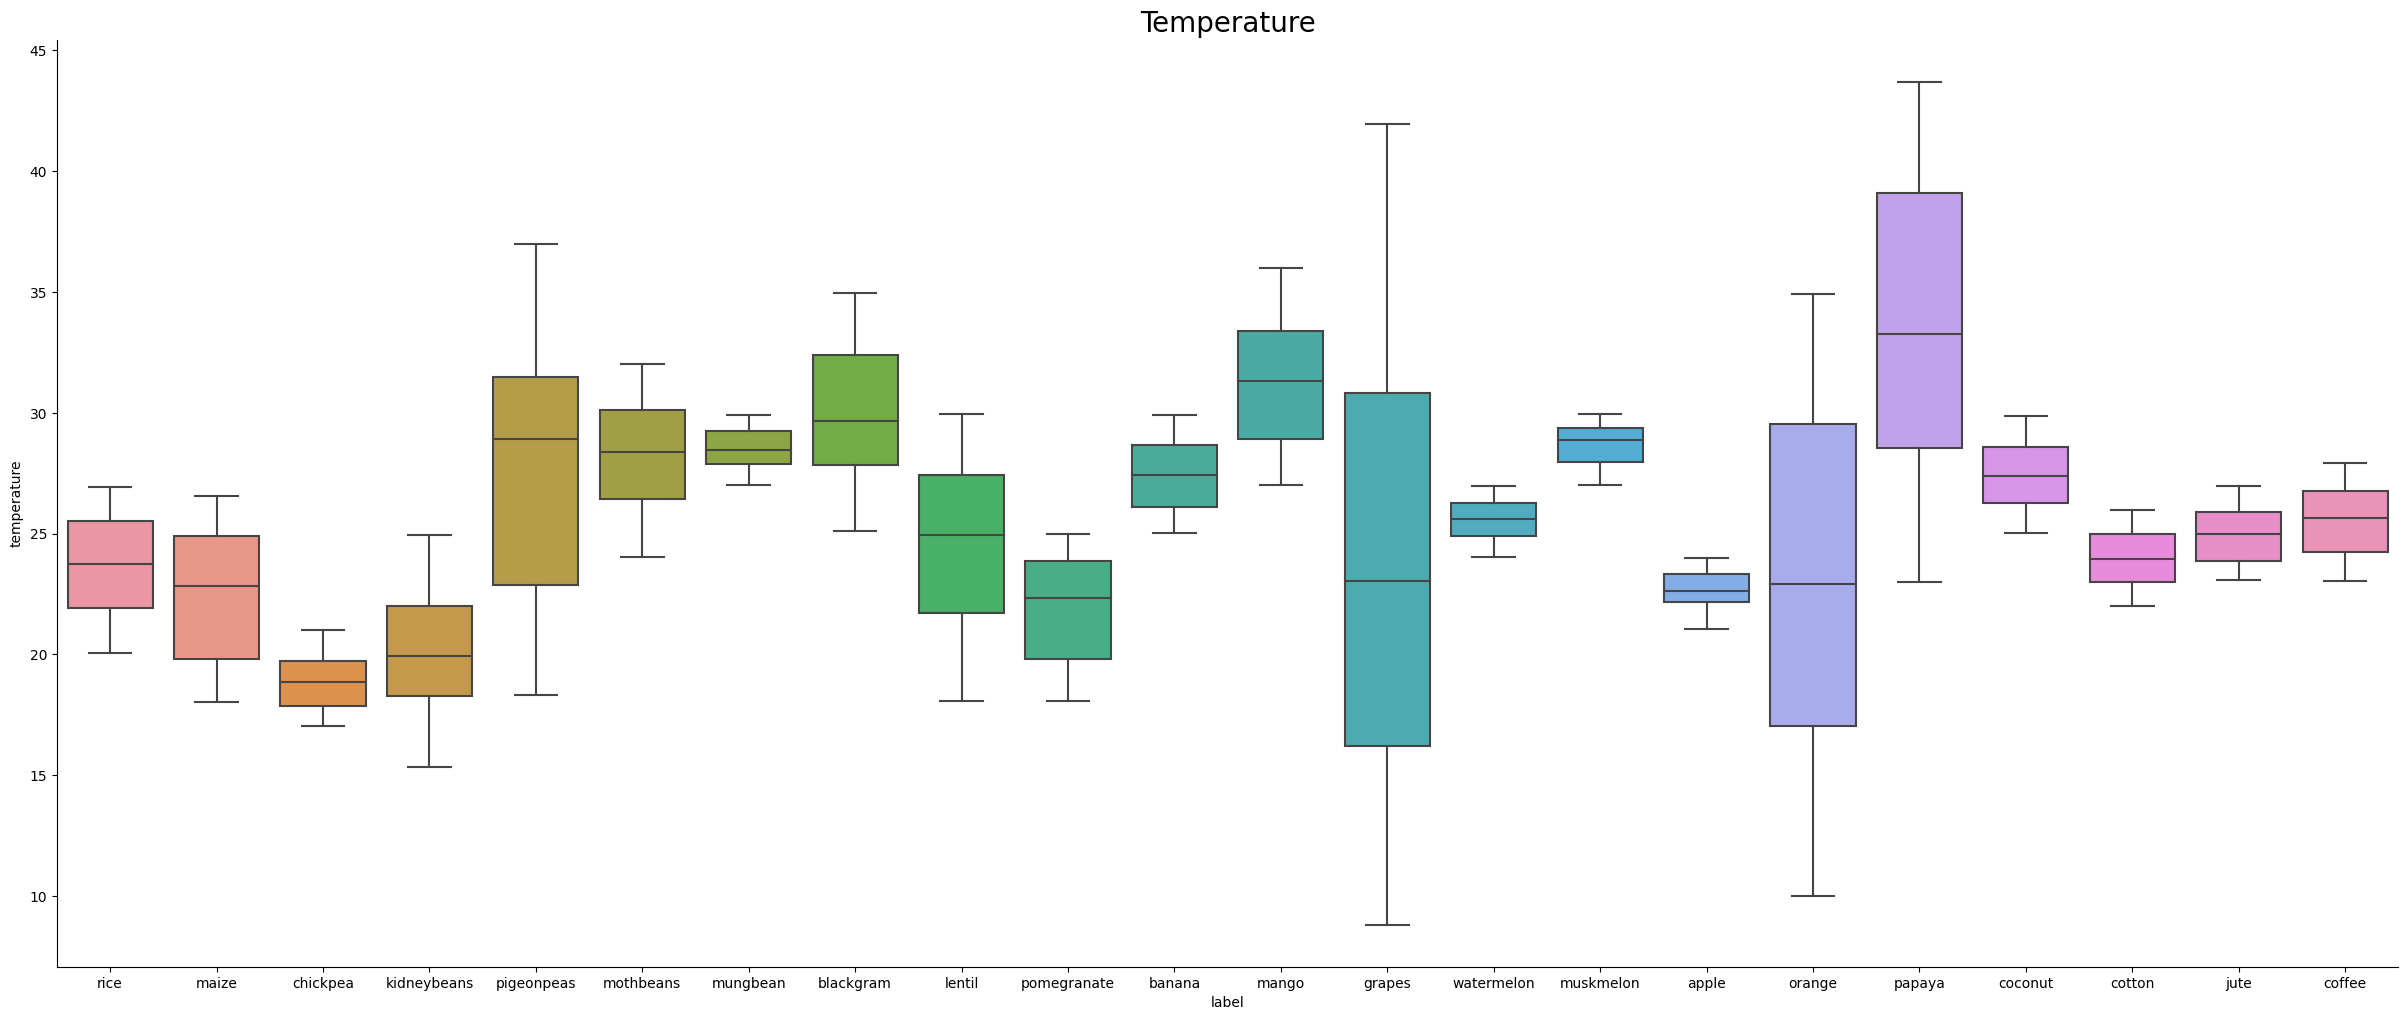

In [24]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

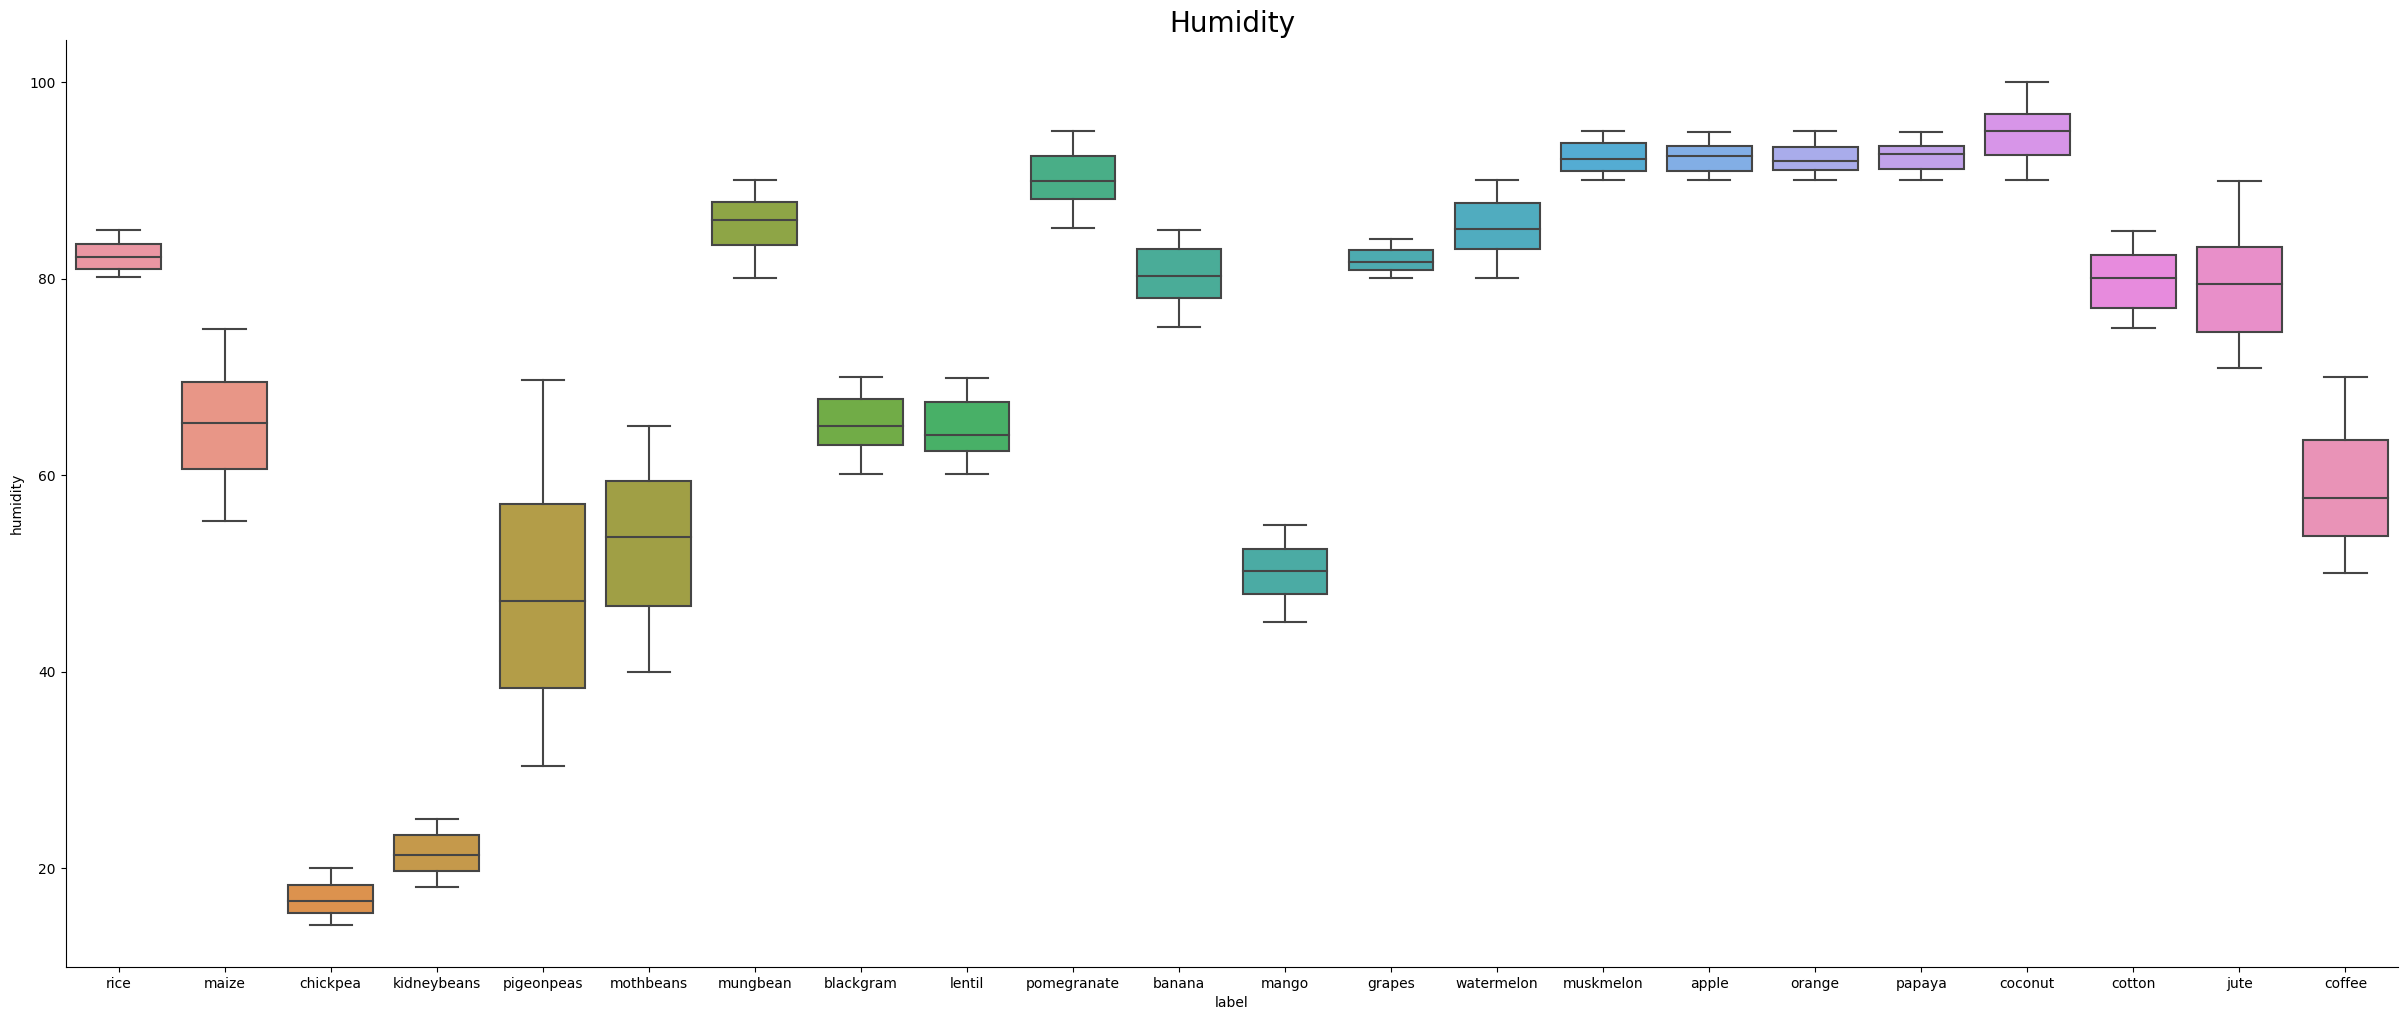

In [25]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

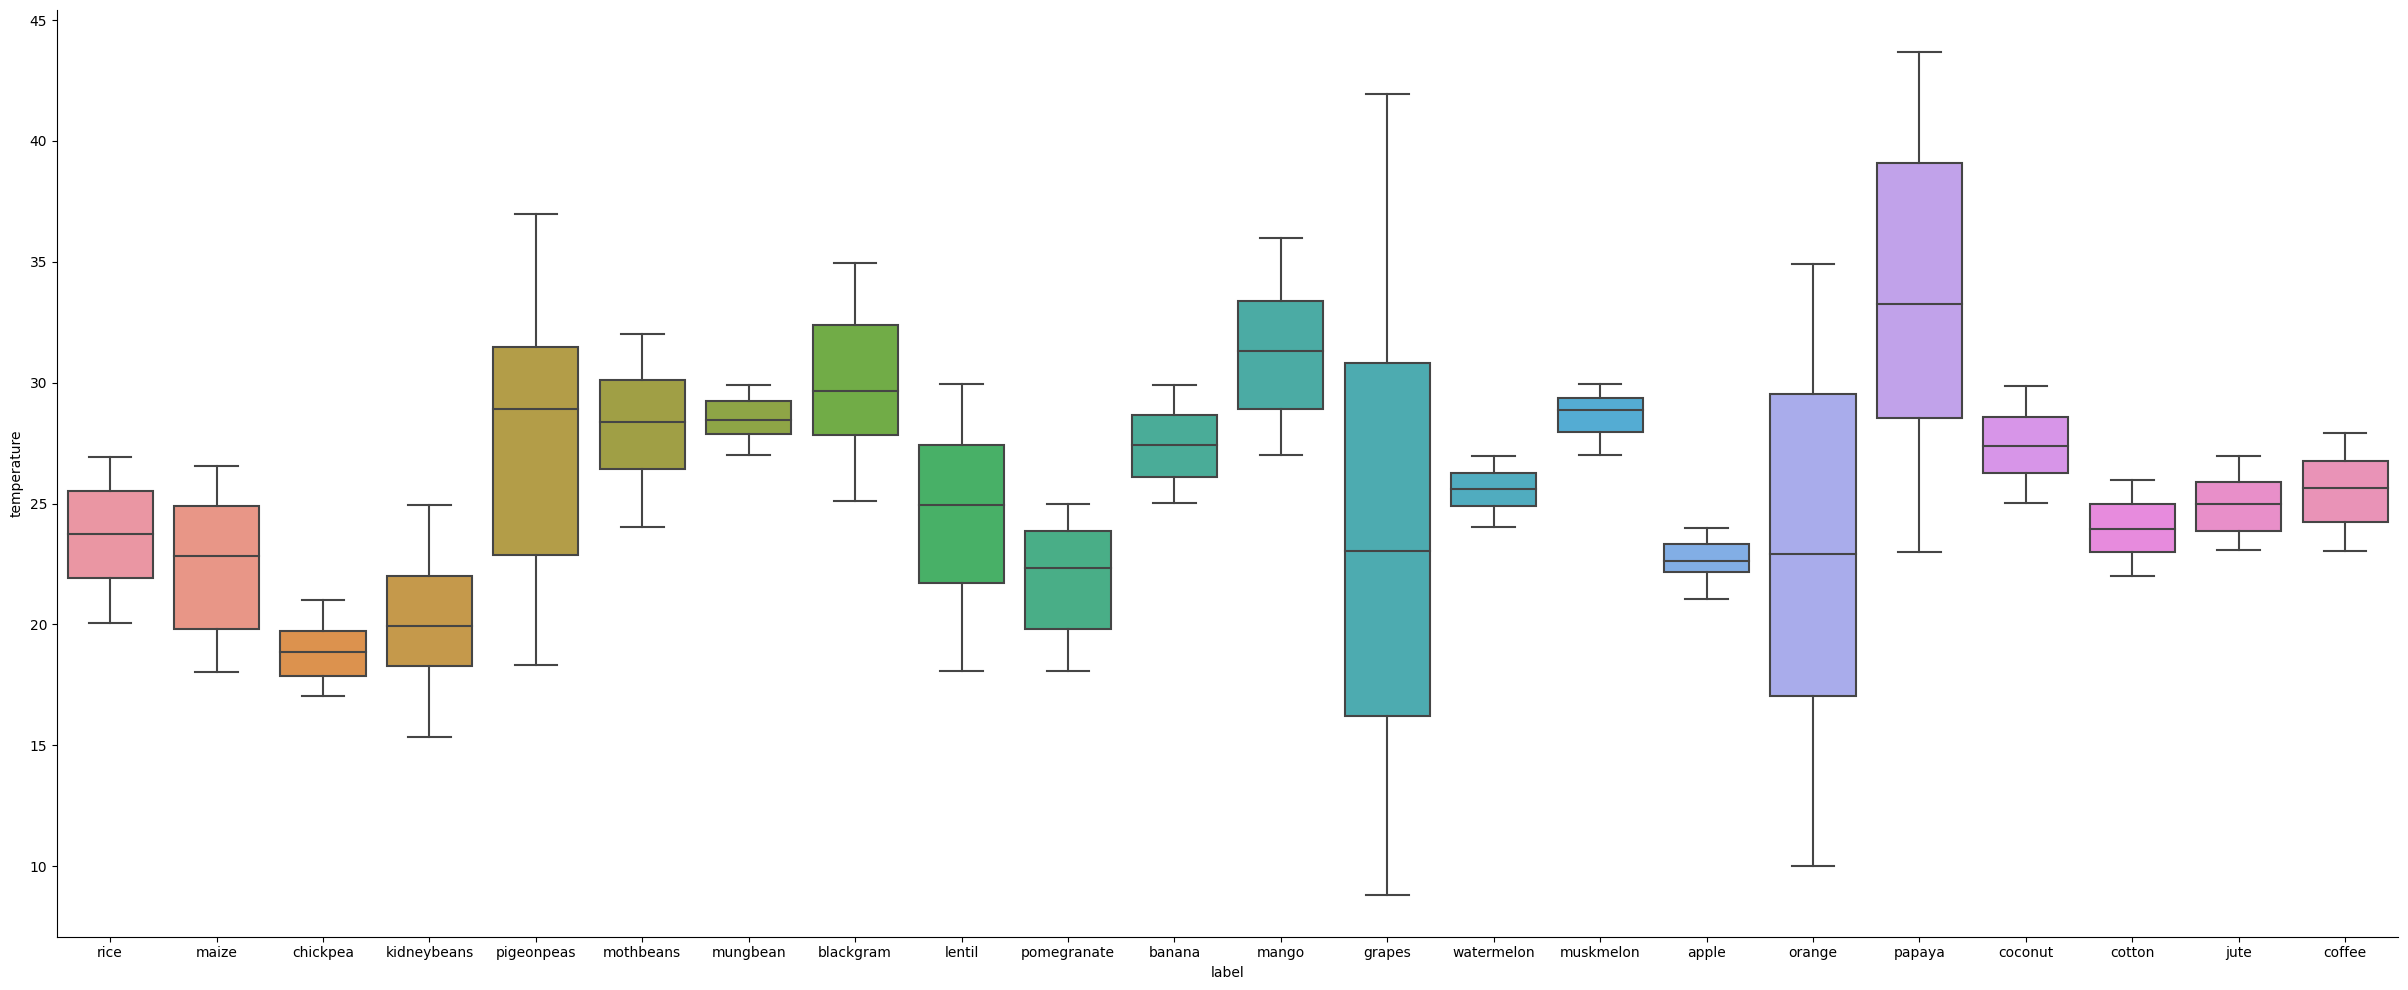

In [26]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
plt.show()

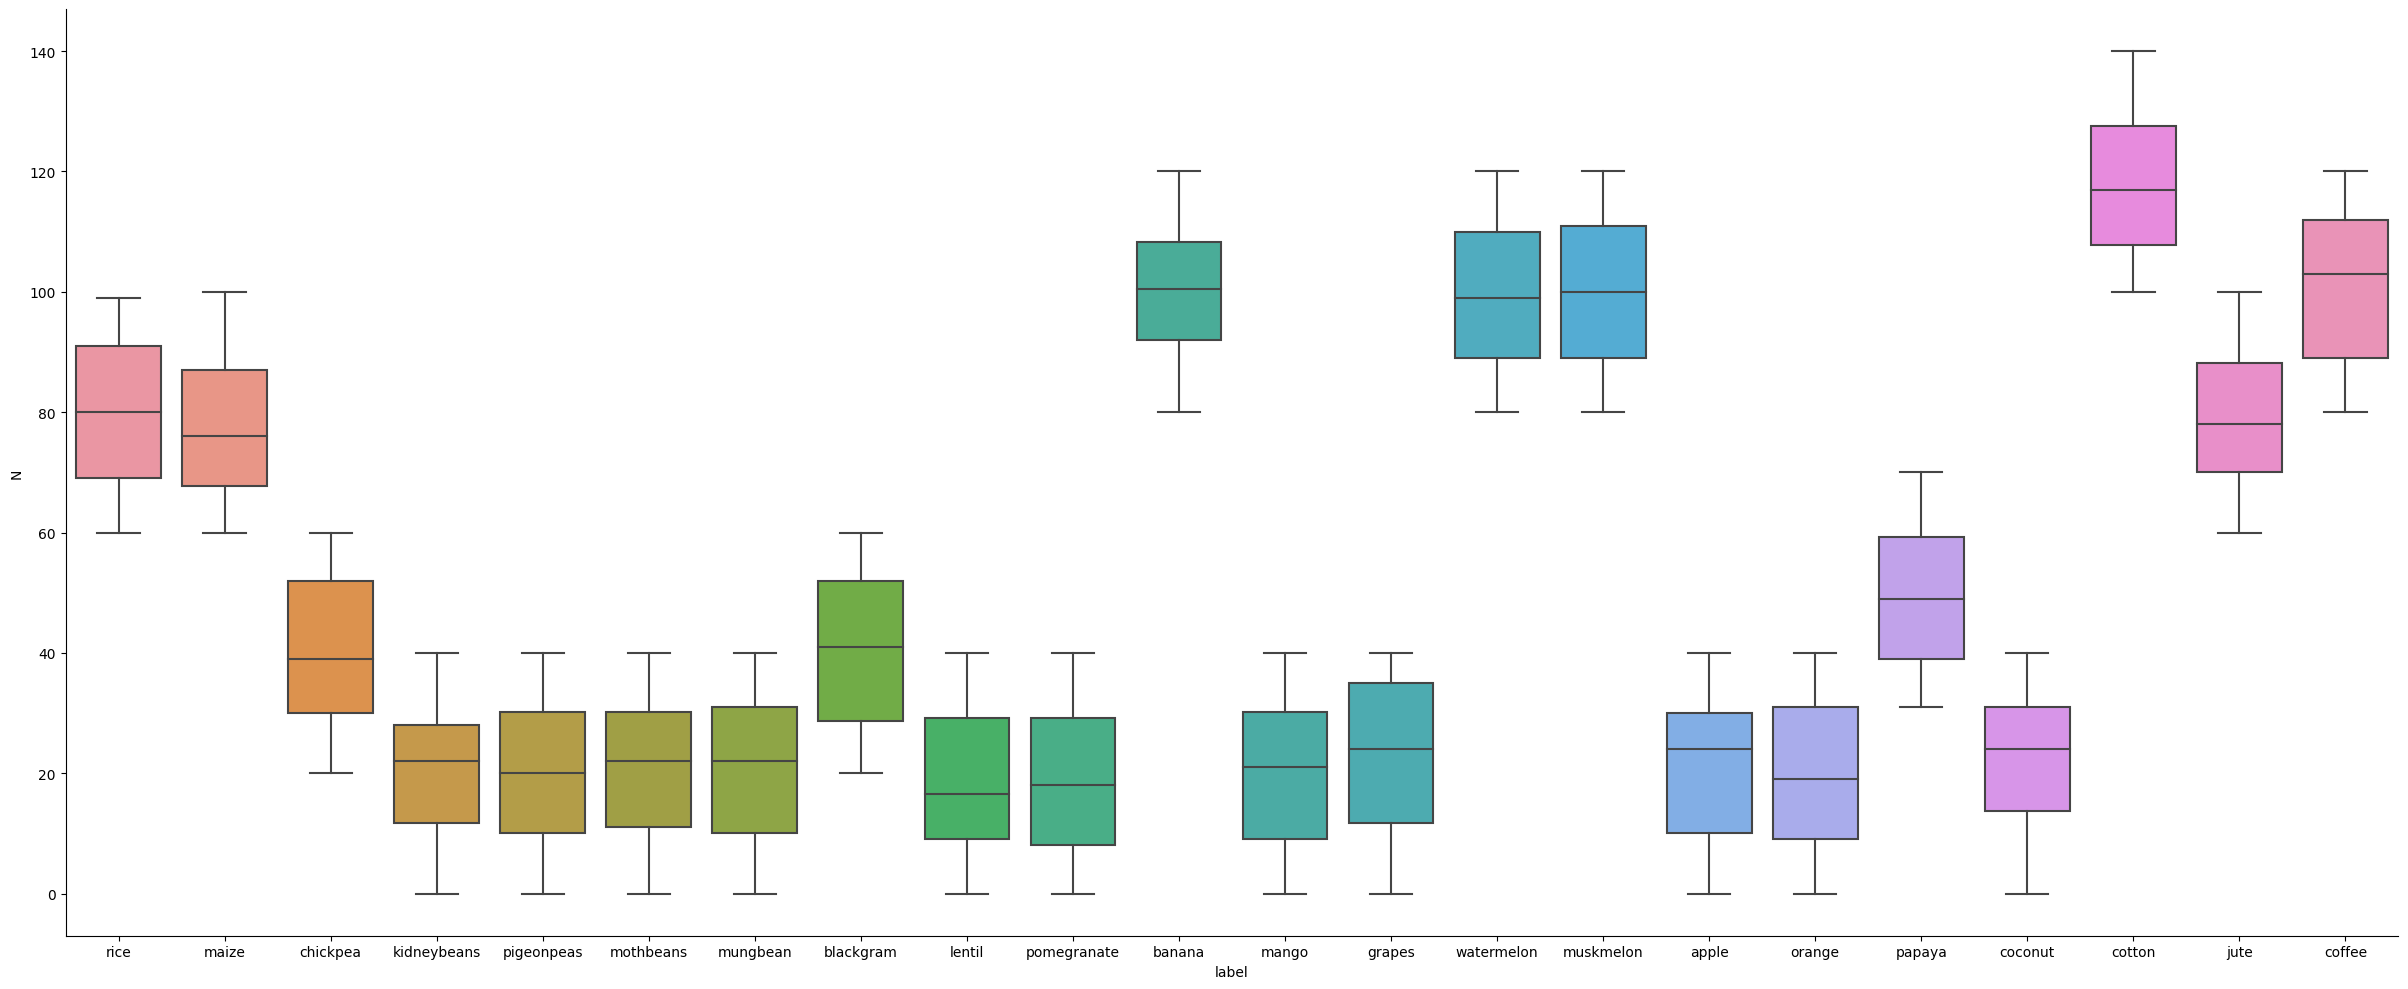

In [27]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.show()

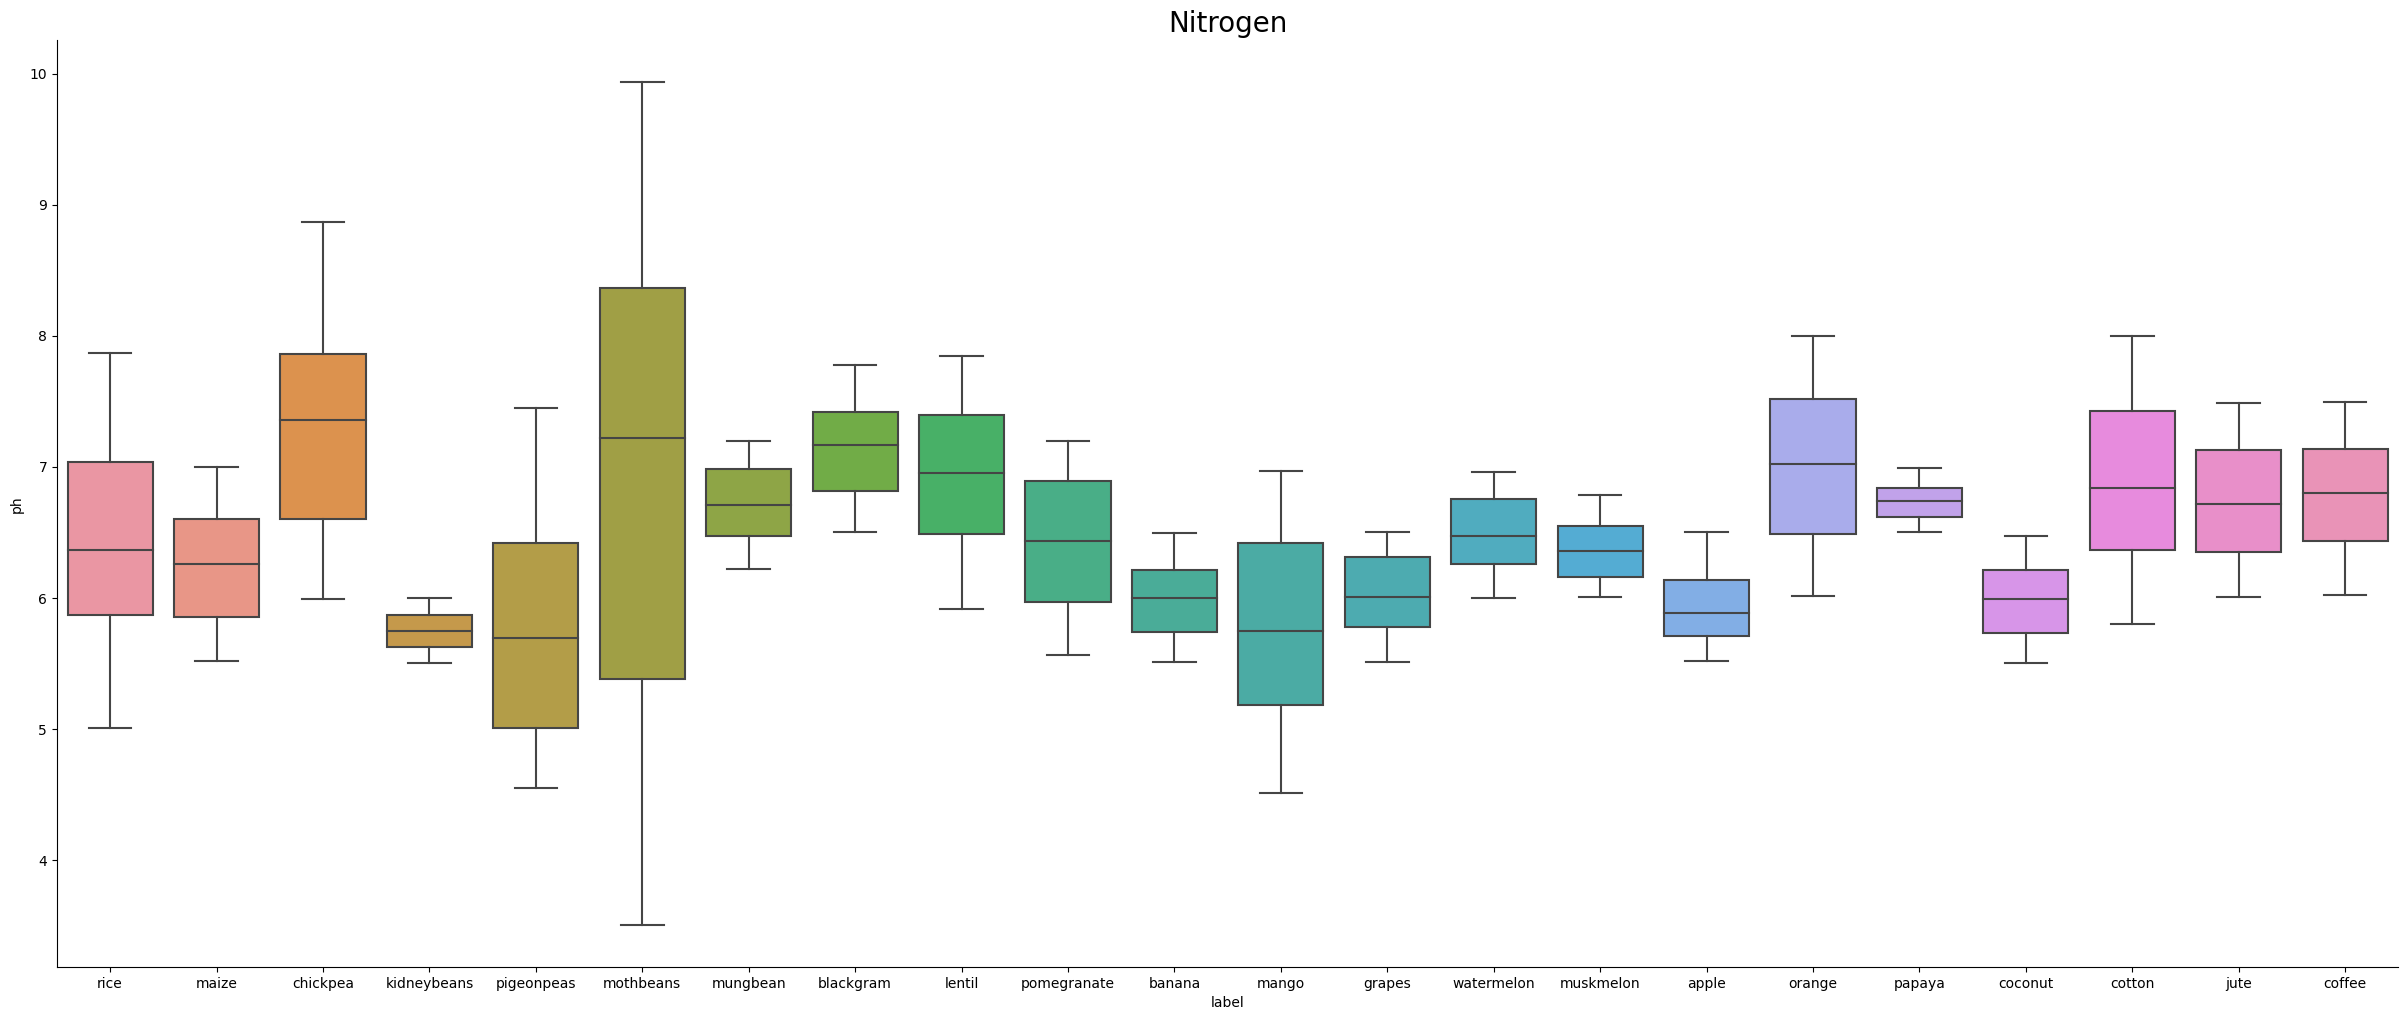

In [28]:
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitrogen",size=20)
plt.show()

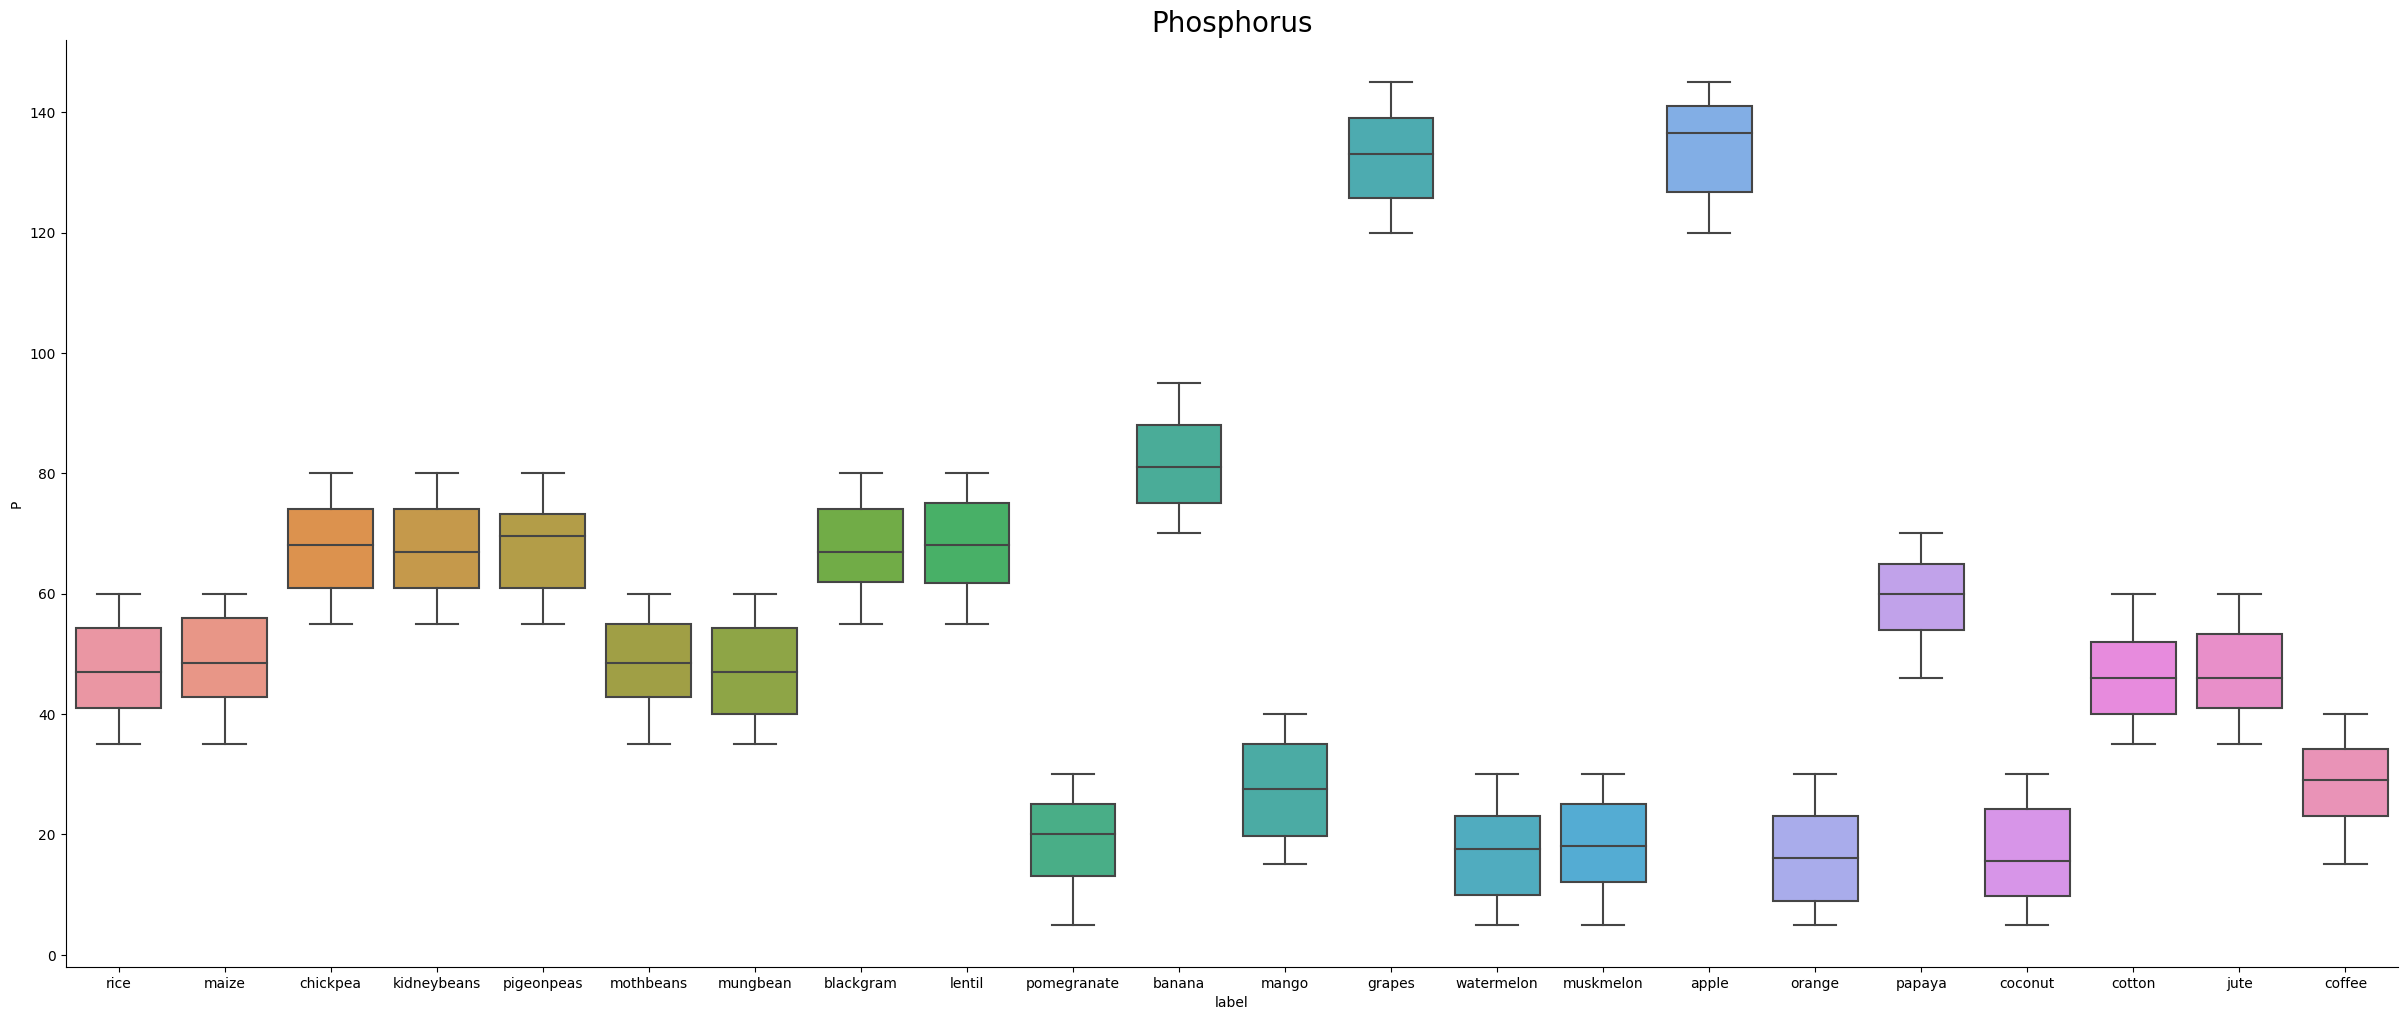

In [29]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

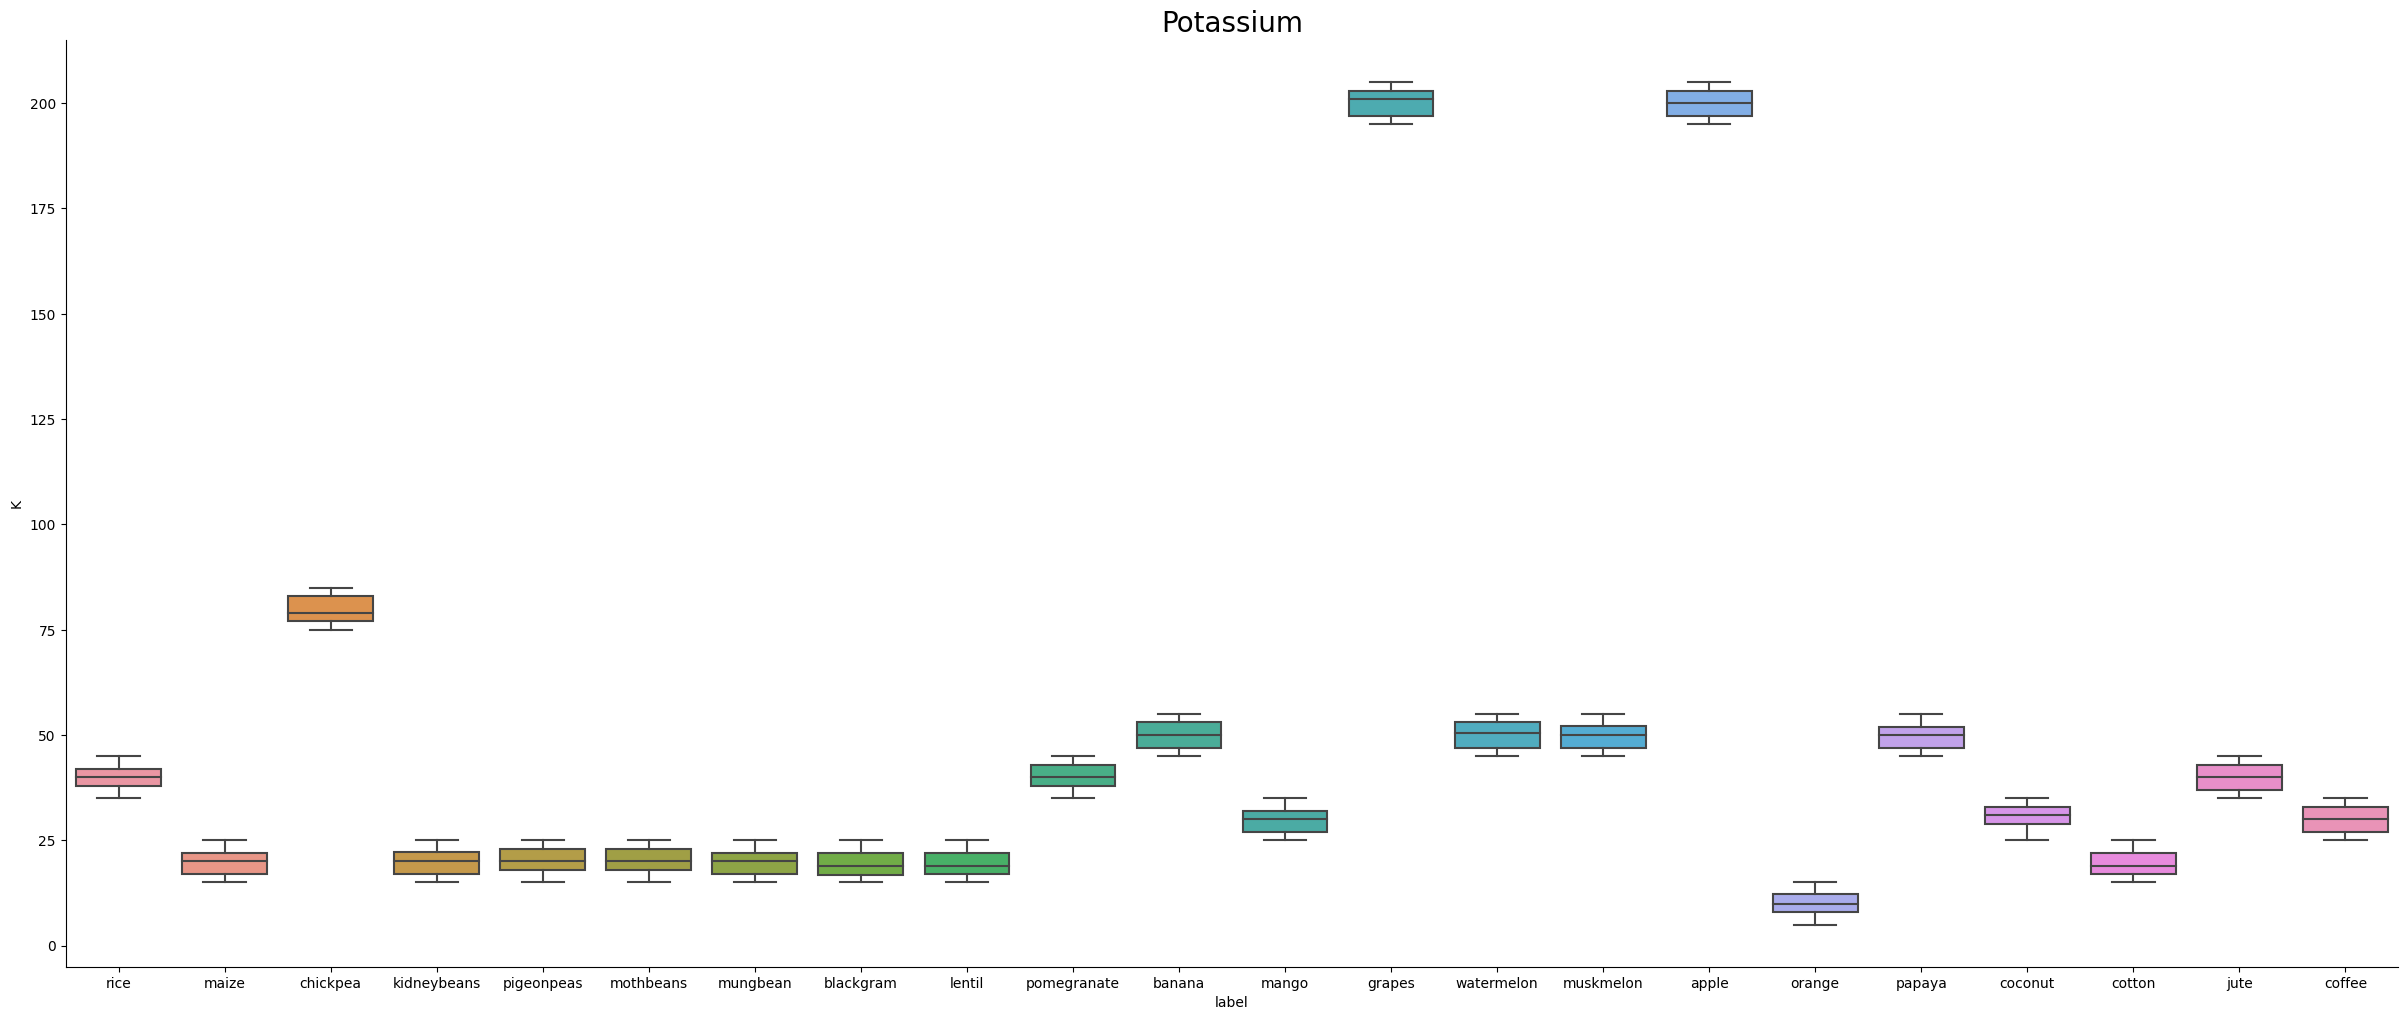

In [30]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

These graphs shows that thers is no outliers present in this dataset

In [31]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

Lower limit: 188.0 Upper limit: 212.0
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [32]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

In [33]:
# These graphs shows that thers is no outliers present in this dataset and it is confirmed with the help of Statistics(IQR)

# *Prediction*

In [34]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [35]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [37]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


In [38]:
a={'decision tree' : {
        'model' : DecisionTreeClassifier(criterion='gini'),
        'params':{'decisiontreeclassifier__splitter':['best','random']}
    },
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
   'k classifier':{
       'model':KNeighborsClassifier(),
       'params':{'kneighborsclassifier__n_neighbors':[5,10,20,25],'kneighborsclassifier__weights':['uniform','distance']}
   }
}

In [40]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Model name':mdl,
        'Best score':res.best_score_,
        'Best param':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.983636,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.987879,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
2,random_forest,0.991515,{'randomforestclassifier__n_estimators': 5}
3,k classifier,0.973333,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [41]:
details[0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013884,0.003591,0.002226,0.000069,best,{'decisiontreeclassifier__splitter': 'best'},0.984848,0.987879,0.978788,0.993939,0.972727,0.983636,0.007323,1
1,0.004874,0.000271,0.001891,0.000055,random,{'decisiontreeclassifier__splitter': 'random'},0.981818,0.951515,0.966667,0.966667,0.963636,0.966061,0.009659,2


In [46]:
score

[{'Model name': 'decision tree',
  'Best score': 0.9836363636363636,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'svm',
  'Best score': 0.9878787878787879,
  'Best param': {'svc__C': 10, 'svc__kernel': 'rbf'}},
 {'Model name': 'random_forest',
  'Best score': 0.9915151515151516,
  'Best param': {'randomforestclassifier__n_estimators': 5}},
 {'Model name': 'k classifier',
  'Best score': 0.9733333333333334,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}}]

In [47]:
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.983636,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.987879,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
2,random_forest,0.991515,{'randomforestclassifier__n_estimators': 5}
3,k classifier,0.973333,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [49]:
predicted = best_param['random_forest'].predict(x_test)
predicted

array([16, 10,  6,  8, 10, 15, 19,  5,  8,  6,  1,  6,  3, 19,  8, 20, 10,
        2,  0,  8,  7,  6,  2,  7, 16, 21, 17,  0, 17, 20, 11, 20,  3, 15,
       10, 15, 17, 14,  7,  0,  5,  5, 11,  1, 16, 15,  1,  5,  5, 21,  6,
        8, 13,  5, 16, 17, 12,  6, 12,  5, 15,  9, 16,  8,  2, 11,  0,  7,
       18,  3, 15, 14, 12, 11,  0, 21, 17, 11, 10,  4, 17, 21,  1, 10,  3,
       11,  0, 14, 16, 12, 13,  0, 11,  6,  9, 12, 14, 10,  7,  4, 15,  6,
       18, 20, 11, 11,  5, 17, 18,  8, 16,  3, 16, 13,  2,  2, 10, 20,  2,
       13, 21, 13, 11, 15,  2,  0,  5,  7, 14,  4,  5,  2,  3, 10, 19, 13,
        3, 16, 10,  3, 21, 20, 20,  9,  7,  9, 20, 21, 16,  4, 11, 19, 14,
       14,  1, 20,  3, 17,  6, 20,  3, 18, 13, 13,  4, 18,  2,  0, 17,  6,
       15,  8,  5, 15, 10,  1,  7,  7,  8, 19, 11, 11,  9, 17, 11,  5,  8,
        6,  2,  3, 14,  6,  3, 14,  3,  1, 11,  7,  4, 11,  2,  1,  0, 10,
       15,  3,  1, 16, 11, 19,  7, 20,  3,  2,  0,  2, 11, 20, 19, 20, 21,
       19,  1, 20, 11, 16

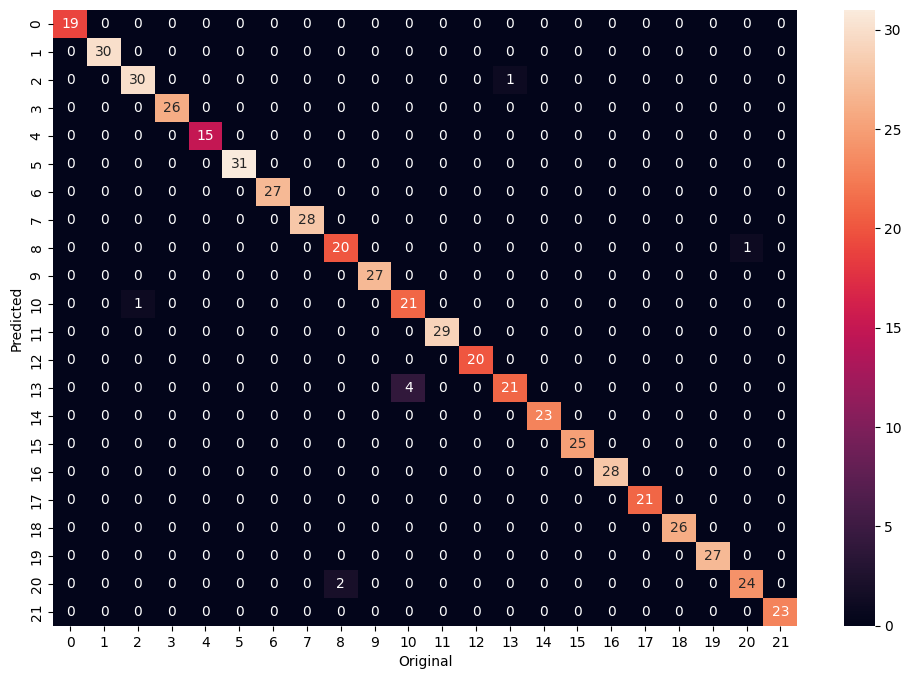

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [51]:
pipe1 = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators = 10))
bag_model = BaggingClassifier(base_estimator=pipe1,n_estimators=100,
                              oob_score=True,random_state=0,max_samples=0.8)

In [52]:
bag_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('randomforestclassifier',
                                                  RandomForestClassifier(n_estimators=10))]),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [53]:
bag_model.score(x_test,y_test)

0.9927272727272727

In [55]:
predict = bag_model.predict(x_test)


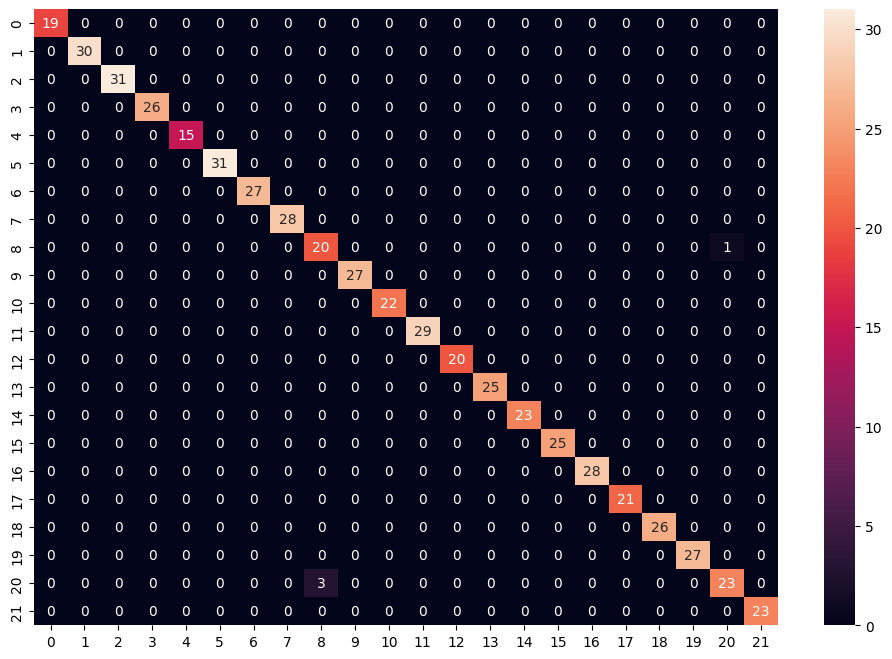

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.show()

4.1 | Value mapping

Value mapping shows that which value is belongs to which crop. It helps in easy reading the predicted value. Eg: If predicted value id 20 then its belongs to Crop rice. So on...

In [57]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [58]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['code']=code
refer['encode']=encode
refer

,code,encode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


In [59]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        28
           8       0.87      0.95      0.91        21
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        28
          17       1.00    